In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

In [2]:
columns = ['class', 'h-infants', 'wproject-cost-sharing', 'adoption-of-the-budget-resolution',
           'physician-fee-freeze', 'el-salvador-aid', 'religious-in-schools', 'anti-satellite',
           'aid-to-nicaraguan', 'mx-missile', 'immigration', 'synfuels-cutback', 'education-spending',
           'superfund-right-to-sue', 'crime', 'duty-free', 'export-south-africa']

df = pd.read_csv('house-votes-84.data', header=None, names=columns)
df.head(3)

,class,h-infants,wproject-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-in-schools,anti-satellite,aid-to-nicaraguan,mx-missile,immigration,synfuels-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   class                              435 non-null    object
 1   h-infants                          435 non-null    object
 2   wproject-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution  435 non-null    object
 4   physician-fee-freeze               435 non-null    object
 5   el-salvador-aid                    435 non-null    object
 6   religious-in-schools               435 non-null    object
 7   anti-satellite                     435 non-null    object
 8   aid-to-nicaraguan                  435 non-null    object
 9   mx-missile                         435 non-null    object
 10  immigration                        435 non-null    object
 11  synfuels-cutback                   435 non-null    object
 12  educatio

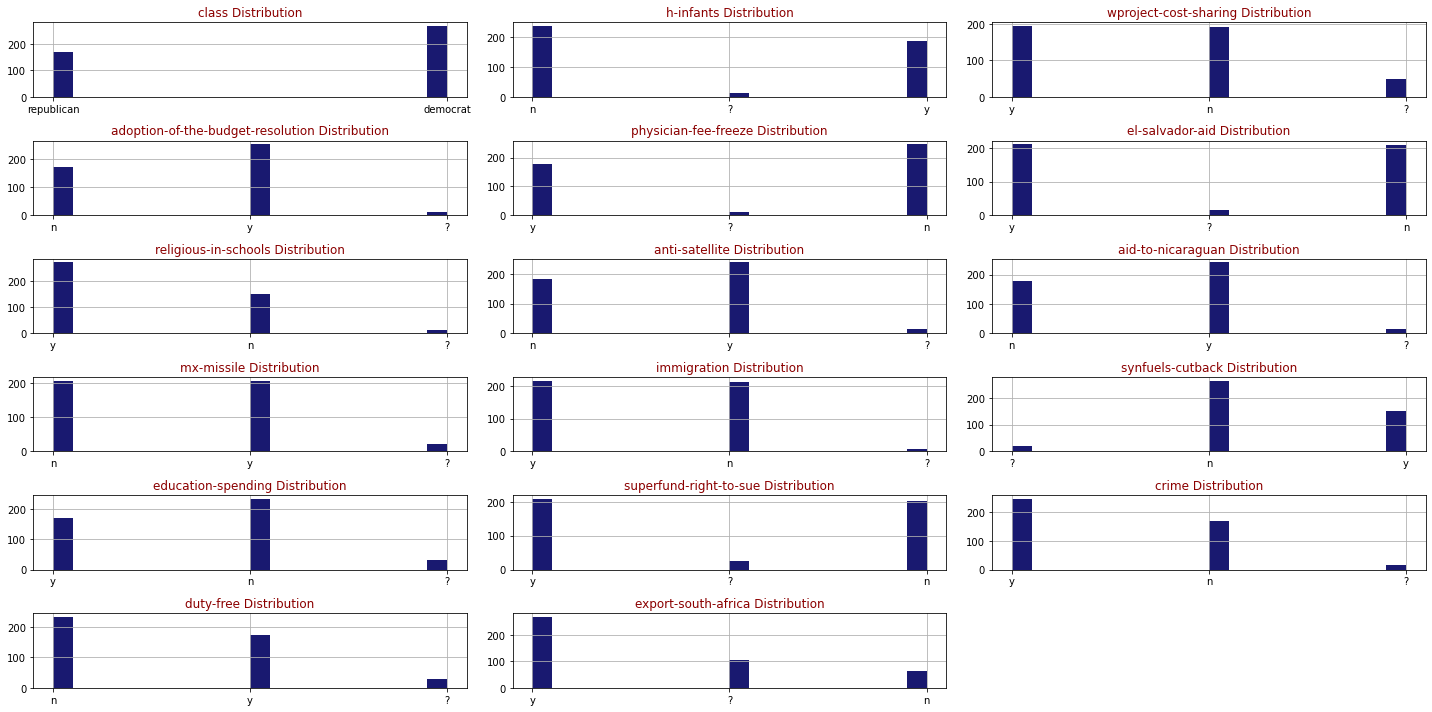

In [4]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [5]:
# Retirar as colunas contendo '?', perderia muitos dados. Vamos usar a base toda, pois o xgboosting aceita nan

new = df[df != '?']
new.dropna()

,class,h-infants,wproject-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-in-schools,anti-satellite,aid-to-nicaraguan,mx-missile,immigration,synfuels-cutback,education-spending,superfund-right-to-sue,crime,duty-free,export-south-africa
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,democrat,n,y,y,n,n,y,y,y,y,n,y,n,n,y,y,y
426,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
427,republican,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y


In [6]:
# Substituindo n = o e y =1 e ? = NaN
df[df == 'n'] = 0
df[df == 'y'] = 1
df[df == 'republican'] = 0
df[df == 'democrat'] = 1
df = df[df != '?']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   class                              435 non-null    object
 1   h-infants                          423 non-null    object
 2   wproject-cost-sharing              387 non-null    object
 3   adoption-of-the-budget-resolution  424 non-null    object
 4   physician-fee-freeze               424 non-null    object
 5   el-salvador-aid                    420 non-null    object
 6   religious-in-schools               424 non-null    object
 7   anti-satellite                     421 non-null    object
 8   aid-to-nicaraguan                  420 non-null    object
 9   mx-missile                         413 non-null    object
 10  immigration                        428 non-null    object
 11  synfuels-cutback                   414 non-null    object
 12  educatio

In [8]:
X = df.drop(["class"],axis=1)
y = df["class"]

X = X.apply(pd.to_numeric)
y = y.apply(pd.to_numeric)

In [9]:
# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3)

In [10]:
# fit model no training data
model = XGBClassifier(n_jobs=-1, objective="binary:hinge")
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:hinge', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]

In [12]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.42%


In [13]:
result_dict = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'balanced_accuracy', 'f1', 'recall', 'precision', 'roc_auc'])
results = pd.DataFrame.from_dict(result_dict)
results = results.drop(['fit_time','score_time'],axis=1)
print (results)

   test_accuracy  test_balanced_accuracy   test_f1  test_recall  \
0       0.965517                0.961154  0.971963     0.981132   
1       0.977011                0.981132  0.980769     0.962264   
2       0.965517                0.961154  0.971963     0.981132   
3       0.942529                0.930135  0.954955     0.981481   
4       0.942529                0.941919  0.953271     0.944444   

   test_precision  test_roc_auc  
0        0.962963      0.961154  
1        1.000000      0.981132  
2        0.962963      0.961154  
3        0.929825      0.930135  
4        0.962264      0.941919  


<AxesSubplot:xlabel='variable', ylabel='value'>

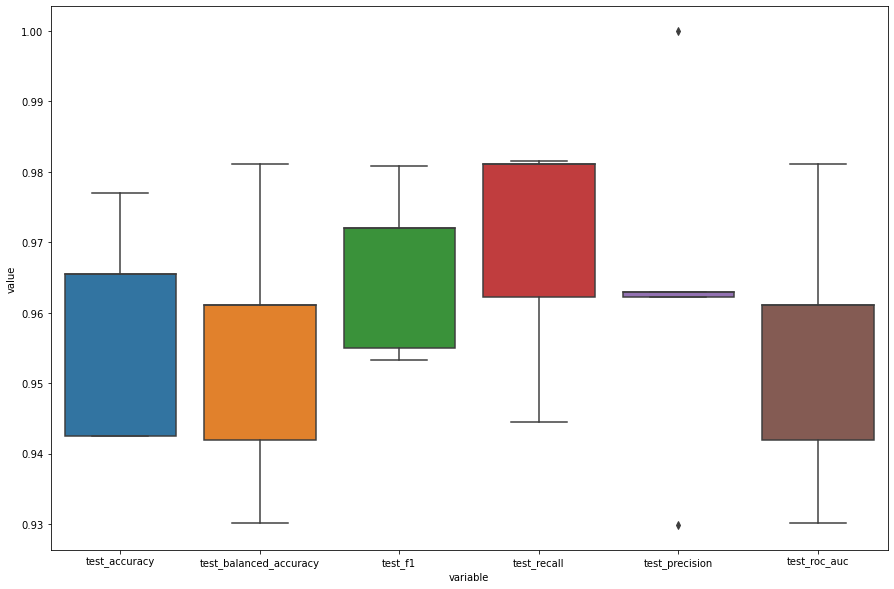

In [14]:
plt.figure(figsize=(15,10))
sns.boxplot(x="variable", y="value", data=pd.melt(results))